# Assignment 3
### Due 9/21. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
NHANES_df = pd.read_csv('./data/nhanes_data_17_18.csv', na_values=(9999,7777))
NHANES_df.head()

C:\Users\isabe\AppData\Local\Temp\ipykernel_19504\2468021675.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  NHANES_df = pd.read_csv('./data/nhanes_data_17_18.csv', na_values=(9999,7777))


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
NHANES_df['missing_weight'] = NHANES_df['CurrentSelfreportedWeightPounds'].isna()
NHANES_df['missing_weight'].value_counts()

missing_weight
False    5724
True     2642
Name: count, dtype: int64

In [17]:
NHANES_df['GeneralHealthCondition'].value_counts()

GeneralHealthCondition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

In [18]:
pd.crosstab(NHANES_df['missing_weight'],NHANES_df['GeneralHealthCondition'])

GeneralHealthCondition,Excellent,Fair or,Good,Poor?,Very good
missing_weight,,,,,
False,492,1100,2226,167,1342
True,127,75,228,5,202


In [19]:
pd.crosstab(NHANES_df['missing_weight'],NHANES_df['GeneralHealthCondition'], normalize='columns')

GeneralHealthCondition,Excellent,Fair or,Good,Poor?,Very good
missing_weight,,,,,
False,0.79483,0.93617,0.90709,0.97093,0.869171
True,0.20517,0.06383,0.09291,0.02907,0.130829


The better someone's general health condition is the more likely they did not fill out the self-reported weight.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [20]:
NHANES_df['CurrentSelfreportedWeightPounds'].dropna()

2       165.0
3       145.0
5       118.0
6       200.0
7       142.0
        ...  
8359    180.0
8361    117.0
8362    218.0
8363    150.0
8365    250.0
Name: CurrentSelfreportedWeightPounds, Length: 5724, dtype: float64

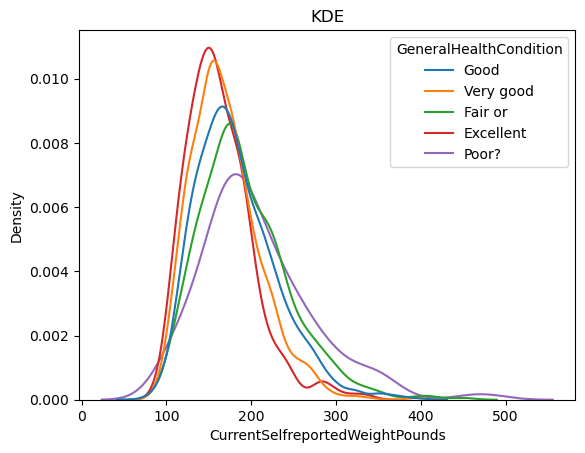

CurrentSelfreportedWeightPounds                         \
                                                 count        mean        std   
GeneralHealthCondition                                                          
Excellent                                        492.0  162.469512  39.620258   
Fair or                                         1100.0  191.737273  53.341340   
Good                                            2226.0  181.793351  48.183931   
Poor?                                            167.0  205.904192  66.251823   
Very good                                       1342.0  169.307750  41.309565   

                                                           
                         min     25%    50%    75%    max  
GeneralHealthCondition                                     
Excellent               90.0  135.00  156.0  185.0  338.0  
Fair or                 86.0  155.00  180.5  220.0  450.0  
Good                    72.0  147.25  175.0  210.0  400.0  
Poor?                   95.0  165.00  195.0  240.0  484.0  
Very good               85.0  140.00  163.5  191.0  400.0

In [21]:
conditioner = 'GeneralHealthCondition'
sns.kdeplot( data=NHANES_df, x='CurrentSelfreportedWeightPounds', hue=conditioner, common_norm=False ).set(title='KDE')
plt.show()
NHANES_df.loc[:,['CurrentSelfreportedWeightPounds', conditioner]].groupby(conditioner).describe()

As you go from the excellent health group to the poor health group, the peak of the data points steadily moved to the right, meaning that people weighed more as their general health condition worsens. You can also see that the poor health group's tail was higher than the others, so there were more people that weighed over 300 pounds. SAY SOMETHING ABOUT TABLE

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

<img src="./Q3.png">

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [26]:
cancer_df = pd.read_csv("./data/metabric.csv")
cancer_df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


Computed bandwidth is: 2.0675968452510816


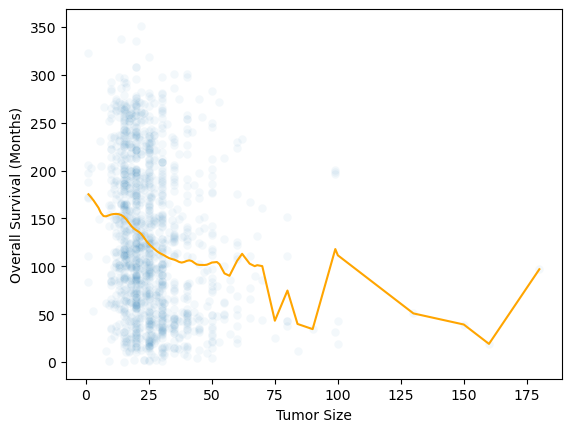

In [ ]:
x = cancer_df['Tumor Size']
y = cancer_df['Overall Survival (Months)']

def lcls(x,y, h = None, plot = True):
    n = len(x)
    grid = np.sort(x.unique())

    if h is None:
        iqr = np.quantile(x,.75) - np.quantile(x,.25)
        h = .9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
        print(f'Computed bandwidth is: {h}')

    I = -(x.to_numpy().reshape(-1,1) - grid.reshape(1,-1))**2
    K = np.exp(I/(2*h**2))/np.sqrt(2*np.pi**2)

    numerator = y@K
    denominator = np.sum(K,axis=0)
    y_hat = numerator/denominator

    if plot:
        sns.scatterplot(data=cancer_df, y='Overall Survival (Months)', x='Tumor Size', alpha=.05)
        sns.lineplot(x=grid, y=y_hat, color='orange')

    return y_hat, grid

y_hat, grid = lcls(x,y)

Based on the LCLS regression, as tumor size grows overall survival decreases. But at around 50 since there aren't as many data points, each data point weighs more and makes the line less interpretable.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome